Install and import pacakges

In [ ]:
!pip install matplotlib-venn

  Using cached matplotlib_venn-0.11.9-py3-none-any.whl


In [ ]:
!pip install openpyxl

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [ ]:
import pandas as pd
import matplotlib
import sys
import os

%matplotlib inline
from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
from matplotlib_venn import venn3_unweighted
from matplotlib_venn import venn2_unweighted

Import file as dataframe

In [ ]:
#df_ldn = pd.read_excel('in_ldn.xlsx')
#df_cris = pd.read_excel('in_cris.xlsx')

df = pd.read_excel('JC_23_003_full_cohort_and_LDN_pain_extract_20230502_no_dupes - Copy.xlsx')

In [ ]:
# take a look at first 5 rows

df.head(2)

Create separate dataframes based on criteria for venn diagram

In [ ]:
df_pain_diag = df[df['N_pain_diagnosis_entries'] > 0]
df_pain_diag.head(2)

In [ ]:
df_pain_med = df[df['N_pain_medication_entries'] > 0]
df_pain_med.head(2)

In [ ]:
df_pain_rx = df[df['N_pain_treatment_entries'] > 0]
df_pain_rx.head(2)

In [ ]:
lst_pain_diag = df_pain_diag['Anonymised_ID'].tolist()
lst_pain_med = df_pain_med['Anonymised_ID'].tolist()
lst_pain_rx = df_pain_rx['Anonymised_ID'].tolist()

In [ ]:
lst_ldn = df_ldn['Anonymised_ID'].tolist()
lst_cris = df_cris['Anonymised_ID'].tolist()

In [ ]:
print("Number of patients in CRIS = ", len(lst_cris))
print("Number of patients in LDN = ", len(lst_ldn))


Number of patients in CRIS =  18427
Number of patients in LDN =  3799


In [ ]:
print("Number of patients in Pain Diagnosis = ", len(lst_pain_diag))
print("Number of patients in Pain Medication = ", len(lst_pain_med))
print("Number of patients in Pain Treatment = ", len(lst_pain_rx))

Number of patients in Pain Diagnosis =  1421
Number of patients in Pain Medication =  956
Number of patients in Pain Treatment =  185


Plot venn diagrams

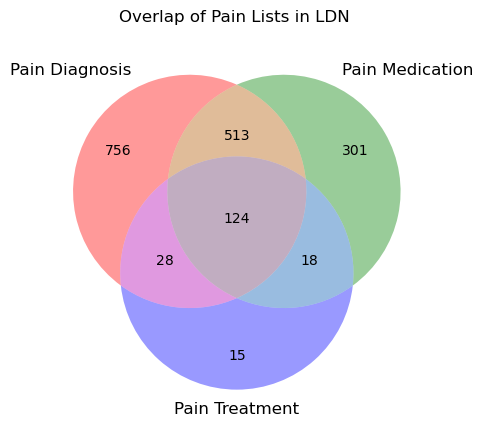

In [ ]:
venn3_unweighted([set(lst_pain_diag), set(lst_pain_med), set(lst_pain_rx)], set_labels = ('Pain Diagnosis', 'Pain Medication', 'Pain Treatment'))
plt.title('Overlap of Pain Lists in LDN \n')
plt.rcParams["figure.figsize"] = (5,10)

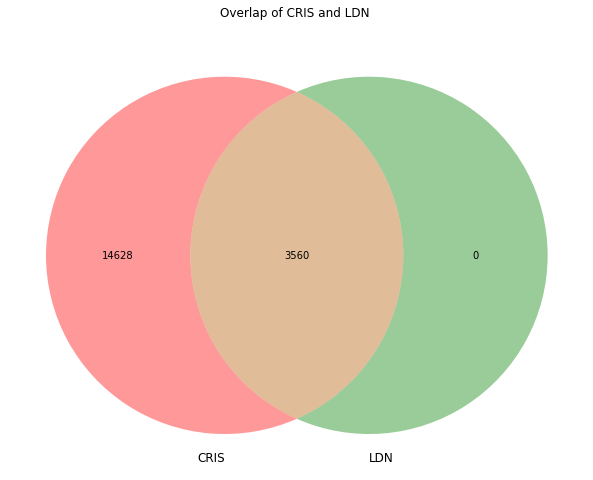

In [ ]:
venn2_unweighted([set(lst_cris), set(lst_ldn)], set_labels = ('CRIS', 'LDN'))
plt.title('Overlap of CRIS and LDN \n')
plt.rcParams["figure.figsize"] = (5,10)

In [ ]:
df.head(2)

In [ ]:
df_overlap = df[df['In_LDN'] == 1]

In [ ]:
df_overlap.head(2)

In [ ]:
df_overlap['jc-pain in LDN'].value_counts()

jc-pain in LDN
no     1805
yes    1755
Name: count, dtype: int64

In [ ]:
df_overlap['gender'].value_counts()

gender
Female    1814
Male      1743
Other        3
Name: count, dtype: int64

In [ ]:
len(df_overlap)

3560

In [ ]:
df_overlap.head(2)

df_overlap contains patients who are in both CRIS and LDN


create a df that contains yes pain in LDN


create a df that contains yes pain in CRIS


do a venn for both

In [ ]:
df_overlap_cris = df_overlap[df_overlap['pain'] == 1]
len(df_overlap_cris)

2848

In [ ]:
df_overlap_ldn = df_overlap[df_overlap['jc-pain in LDN'] == "yes"]
len(df_overlap_ldn)

1755

In [ ]:
lst_ldn = df_overlap_ldn['Anonymised_ID'].tolist()
lst_cris = df_overlap_cris['Anonymised_ID'].tolist()

In [ ]:
df_ldn_pain_rec = pd.read_excel('ldn_pain_recorded.xlsx')
df_cris_pain_rec = pd.read_excel('cris_pain_recorded.xlsx')

In [ ]:
lst_ldn = df_ldn_pain_rec['Anonymised_ID'].tolist()
lst_cris = df_cris_pain_rec['Anonymised_ID'].tolist()

In [ ]:
print("Number of patients with recorded pain in CRIS = ", len(lst_cris))
print("Number of patients with recorded pain in LDN = ", len(lst_ldn))

Number of patients with recorded pain in CRIS =  2848
Number of patients with recorded pain in LDN =  1755


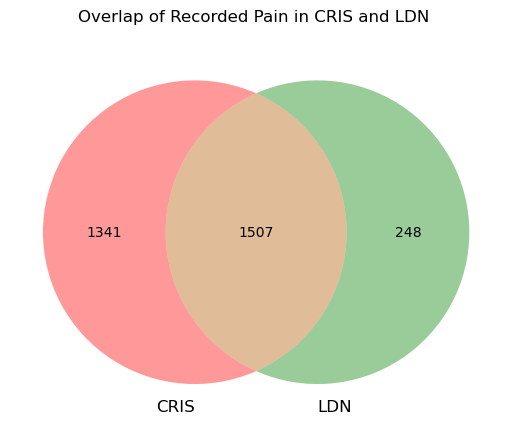

In [ ]:
venn2_unweighted([set(lst_cris), set(lst_ldn)], set_labels = ('CRIS', 'LDN'))
plt.title('Overlap of Recorded Pain in CRIS and LDN \n')
plt.rcParams["figure.figsize"] = (8,20)



In [ ]:
df = pd.read_excel('JC_23_003_full_cohort_and_LDN_pain_extract_20230421.xlsx', 'copy')

In [ ]:
df.head()

In [ ]:
df_pain_rec_cris_only = df[(df['cris_only_pain'] == 1)]

In [ ]:
df_pain_rec_cris_only.head()

In [ ]:
df_pain_rec_cris_only['cris_only_pain'].value_counts()

In [ ]:
df_pain_rec_cris_only['gender'].value_counts(normalize=True)

In [ ]:
df_pain_rec_cris_only['ethnicity'].value_counts(normalize=True)

In [ ]:
df_pain_rec_cris_only['diagnosis_code'].value_counts(normalize=True)

In [ ]:
df_pain_rec_cris_only.describe()

In [ ]:
df_pain_rec_ldn_only = df[(df['ldn_only_pain'] == 1)]

In [ ]:
df_pain_rec_ldn_only.head()

In [ ]:
df_pain_rec_ldn_only['ldn_only_pain'].value_counts()

In [ ]:
df_pain_rec_ldn_only['gender'].value_counts(normalize=True)

In [ ]:
df_pain_rec_ldn_only['ethnicity'].value_counts(normalize=True)

In [ ]:
df_pain_rec_ldn_only['diagnosis_code'].value_counts(normalize=True)

In [ ]:
df_pain_rec_ldn_only.describe()